# CODING CHALLENGE – DATA SCIENTIST

## Aufgabe

Unter https://www.openml.org/d/41214 und https://www.openml.org/d/41215 finden Sie zwei Daten-
sätze eines französischen Automobilversicherers. Diese beinhalten Risikomerkmale und Schaden-
informationen zu Kraftfahrt-Haftpflicht-Versicherungsverträgen (eine Datensatzbeschreibung finden Sie
am Ende dieses Textes). 

Aufgabe: Modellierung der zu erwartenden Schadenhöhe pro Versicherungsnehmer und Jahr 
anhand der Risikomerkmale der Kunden. Dieser Wert ist Basis für die Berechnung eines 
fairen Versicherungsbeitrags.

### Meine Annahme: Die Features 'ClaimAmount', 'Exposure' und 'ClaimNb' dürfen nicht verwendet werden, um einen fairen Versicherungsbeitrag für einen Kunden zu berechnen. Werden diese Features doch verwendet, führen sie zu unrealistisch guten Ergebnissen, die in Realität mit den verfügbaren Daten nicht erzielt werden können.

Da die Regression nicht vielversprechend aussah, habe ich mich dazu entschieden, die Aufgabe mittels Klassifikation zu lösen. Dazu habe ich viele Teile aus dem Notebook "Coding_Challenge_HUK-Coburg_Regression.ipynb" behalten und nur kleine Teile verändert.

In [1]:
!pip install arff

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import arff
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_freq = arff.load('freMTPL2freq.arff')
df_freq = pd.DataFrame(data_freq, columns=["IDpol", "ClaimNb", "Exposure", "Area", "VehPower",
"VehAge","DrivAge", "BonusMalus", "VehBrand", "VehGas", "Density", "Region"])

data_sev = arff.load('freMTPL2sev.arff')
df_sev = pd.DataFrame(data_sev, columns=["IDpol", "ClaimAmount"])

## Erstellung des Labels:

In [4]:
# Merge der beiden Datensätze basierend auf der IDpol
data = pd.merge(df_freq, df_sev, on='IDpol')

# Feature Engineering: Erstellen der abhängigen Variable (Schadenhöhe pro Jahr)
data['ClaimAmountPerYear'] = data['ClaimAmount'] / data['Exposure']

In [5]:
data.describe()

,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density,ClaimAmount,ClaimAmountPerYear
count,2.644400e+04,26444.000000,26444.000000,26444.000000,26444.000000,26444.000000,26444.000000,26444.000000,2.644400e+04,2.644400e+04
mean,2.280004e+06,1.139427,0.691791,6.464415,7.355090,45.121502,65.231054,2015.302942,2.265513e+03,9.826644e+03
std,1.583004e+06,0.617563,0.313213,2.017260,5.165475,14.694677,20.143480,4162.639153,2.937103e+04,1.854732e+05
min,1.390000e+02,1.000000,0.002740,4.000000,0.000000,18.000000,50.000000,2.000000,1.000000e+00,1.000000e+00
25%,1.086381e+06,1.000000,0.450000,5.000000,3.000000,34.000000,50.000000,115.000000,6.859925e+02,1.128000e+03
50%,2.133756e+06,1.000000,0.760000,6.000000,7.000000,45.000000,55.000000,524.500000,1.172000e+03,1.433333e+03
75%,3.183953e+06,1.000000,1.000000,7.000000,11.000000,54.000000,76.000000,2252.000000,1.212385e+03,3.171083e+03
max,6.113971e+06,16.000000,2.000000,15.000000,99.000000,99.000000,228.000000,27000.000000,4.075401e+06,1.852455e+07


In [6]:
data['ClaimAmountPerYear'].median()

1433.3333333333335

## Data Exploration

In [7]:
data

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,ClaimAmount,ClaimAmountPerYear
0,139.0,1.0,0.75,'F',7.0,1.0,61.0,50.0,'B12',Regular,27000.0,'R11',303.00,404.000000
1,190.0,1.0,0.14,'B',12.0,5.0,50.0,60.0,'B12',Diesel,56.0,'R25',1981.84,14156.000000
2,414.0,1.0,0.14,'E',4.0,0.0,36.0,85.0,'B12',Regular,4792.0,'R11',1456.55,10403.928571
3,424.0,2.0,0.62,'F',10.0,0.0,51.0,100.0,'B12',Regular,27000.0,'R11',989.64,1596.193548
4,424.0,2.0,0.62,'F',10.0,0.0,51.0,100.0,'B12',Regular,27000.0,'R11',9844.36,15878.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26439,6113793.0,1.0,0.14,'C',7.0,2.0,51.0,50.0,'B12',Diesel,178.0,'R72',1769.88,12642.000000
26440,6113817.0,1.0,0.17,'D',4.0,0.0,35.0,51.0,'B12',Regular,1719.0,'R82',1288.28,7578.117647
26441,6113834.0,2.0,0.17,'C',15.0,3.0,36.0,50.0,'B12',Regular,181.0,'R54',10290.00,60529.411765
26442,6113834.0,2.0,0.17,'C',15.0,3.0,36.0,50.0,'B12',Regular,181.0,'R54',1940.40,11414.117647


## Untersuche die Zielvariable

array([[<Axes: title={'center': 'ClaimAmountPerYear'}>]], dtype=object)

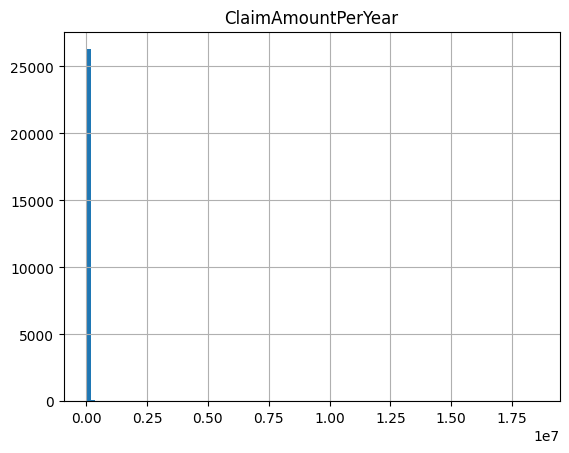

In [8]:
data.hist(column=["ClaimAmountPerYear"], bins=100)

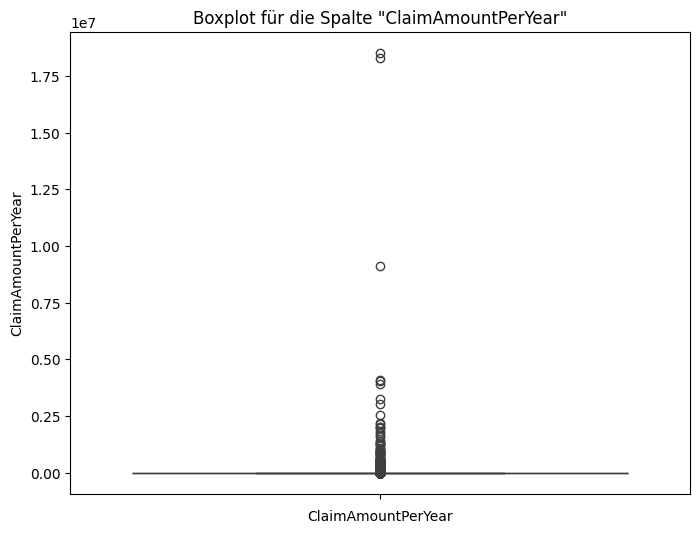

In [9]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['ClaimAmountPerYear'])
plt.title('Boxplot für die Spalte "ClaimAmountPerYear"')
plt.xlabel('ClaimAmountPerYear')
plt.show()

In [10]:
# Ausreißer zählen
q1 = data['ClaimAmountPerYear'].quantile(0.25)
q3 = data['ClaimAmountPerYear'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = data[(data['ClaimAmountPerYear'] < lower_bound) | (data['ClaimAmountPerYear'] > upper_bound)]
num_outliers = outliers.shape[0]

print("Anzahl der Ausreißer:", num_outliers)

Anzahl der Ausreißer: 3556


In [11]:
total_value = len(data) 
part_value = num_outliers  
percentage = (part_value / total_value) * 100
print(str(percentage) + "% sind Ausreißer in der Zielvariablen mit einem IQR von 3.")

13.447284828316441% sind Ausreißer in der Zielvariablen mit einem IQR von 3.


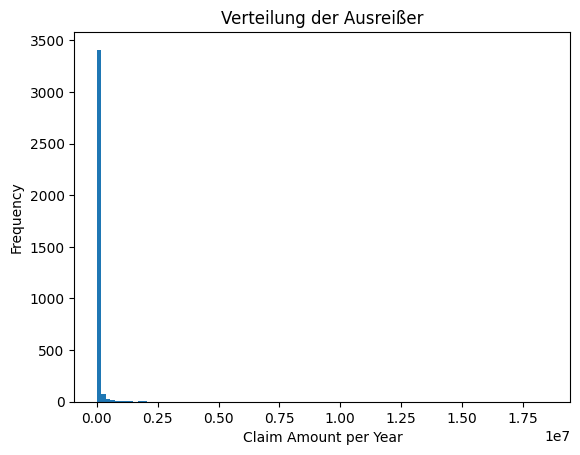

Median der Ausreißer: 13264.412037037036


In [12]:
# Verteilung der Ausreißer anzeigen (Histogramm)
plt.hist(outliers['ClaimAmountPerYear'], bins=100)
plt.xlabel('Claim Amount per Year')
plt.ylabel('Frequency')
plt.title('Verteilung der Ausreißer')
plt.show()

# Median der Ausreißer bestimmen
median_outliers = outliers['ClaimAmountPerYear'].median()
print("Median der Ausreißer:", median_outliers)

In [13]:
# Ausreißer auf den Median aller Ausreißer setzen
#data.loc[(data['ClaimAmountPerYear'] < lower_bound) | (data['ClaimAmountPerYear'] > upper_bound), 'ClaimAmountPerYear'] = median_outliers


In [14]:
# Bestimmen der Werte, die nicht als Ausreißer gelten
#non_outliers = data[(data['ClaimAmountPerYear'] >= lower_bound) & (data['ClaimAmountPerYear'] <= upper_bound)]

# Höchsten Wert unter den nicht als Ausreißer geltenden Werten bestimmen
#highest_non_outlier = non_outliers['ClaimAmountPerYear'].max()

# Ausreißer auf den höchsten nicht als Ausreißer geltenden Wert setzen
#data.loc[(data['ClaimAmountPerYear'] < lower_bound) | (data['ClaimAmountPerYear'] > upper_bound), 'ClaimAmountPerYear'] = highest_non_outlier

# Überprüfen, ob die Werte erfolgreich geändert wurden
#print("Anzahl der Ausreißer nach Anpassung:", data[(data['ClaimAmountPerYear'] < lower_bound) | (data['ClaimAmountPerYear'] > upper_bound)].shape[0])


In [15]:
# Remove outliers from the original DataFrame
#data_without_outliers = data.drop(outliers.index)
#data = data_without_outliers

In [16]:
non_outliers = data[(data['ClaimAmountPerYear'] >= lower_bound) & (data['ClaimAmountPerYear'] <= upper_bound)]

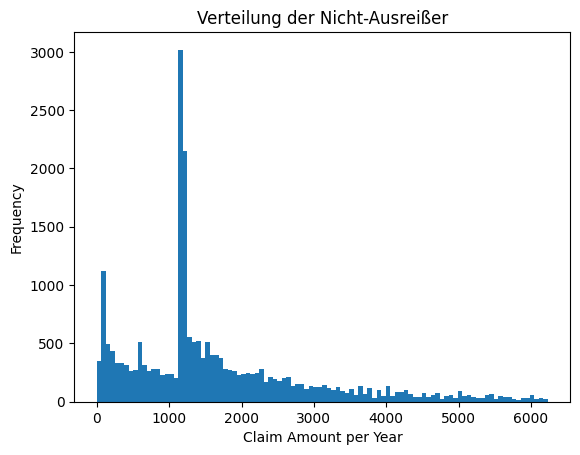

Median der Nicht-Ausreißer: 1220.8333333333335


In [17]:
# Verteilung der Ausreißer anzeigen (Histogramm)
plt.hist(non_outliers['ClaimAmountPerYear'], bins=100)
plt.xlabel('Claim Amount per Year')
plt.ylabel('Frequency')
plt.title('Verteilung der Nicht-Ausreißer')
plt.show()

# Median der Ausreißer bestimmen
median_outliers = non_outliers['ClaimAmountPerYear'].median()
print("Median der Nicht-Ausreißer:", median_outliers)


In [22]:
num_bins = 2
bins = pd.qcut(data['ClaimAmountPerYear'], q=num_bins, labels=["Niedrig", "Hoch"]) #, labels=["Niedrig", "Niedrig-Mittel", "Mittel", "Mittel-Hoch", "Hoch"])

data['bin'] = bins


<Axes: xlabel='bin'>

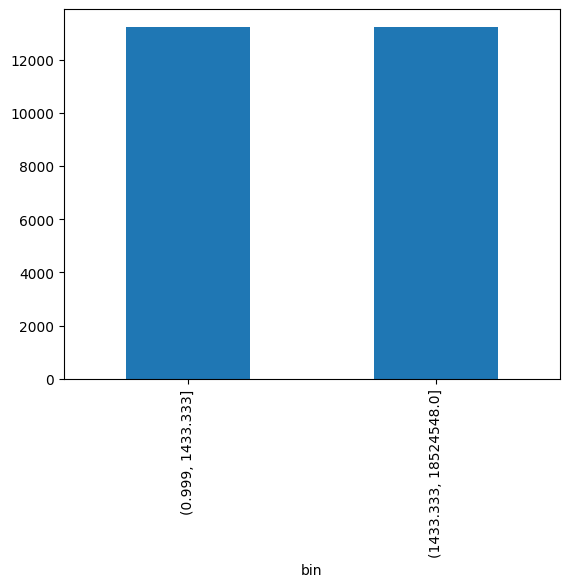

In [21]:
data['bin'].value_counts().plot(kind='bar')

## Untersuche unabhängige Variablen

array([[<Axes: title={'center': 'BonusMalus'}>]], dtype=object)

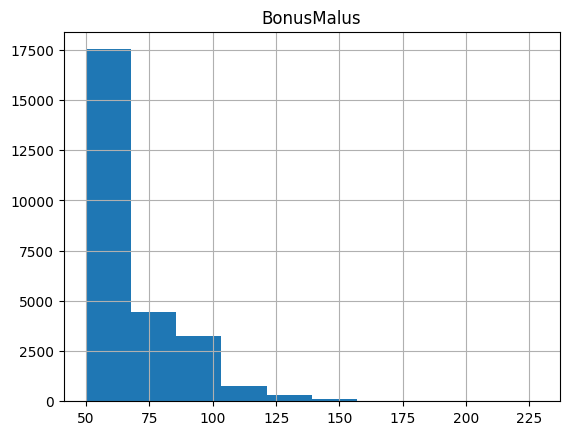

In [23]:
data.hist(column=["BonusMalus"])

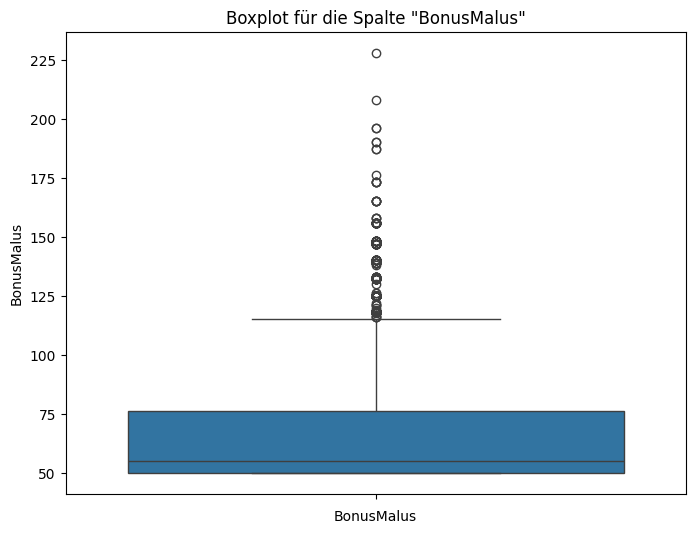

In [24]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['BonusMalus'])
plt.title('Boxplot für die Spalte "BonusMalus"')
plt.xlabel('BonusMalus')
plt.show()

<Axes: xlabel='ClaimNb'>

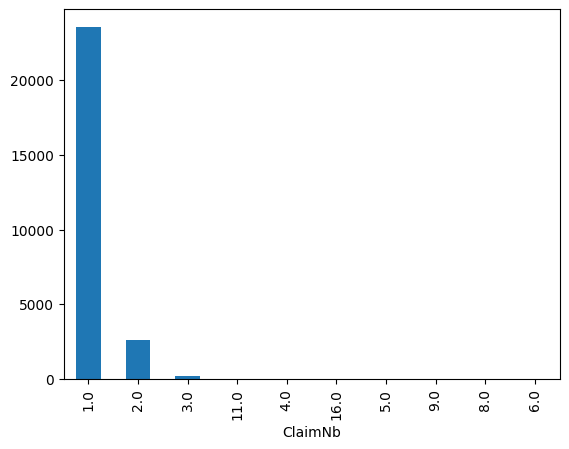

In [25]:
data['ClaimNb'].value_counts().plot(kind='bar')

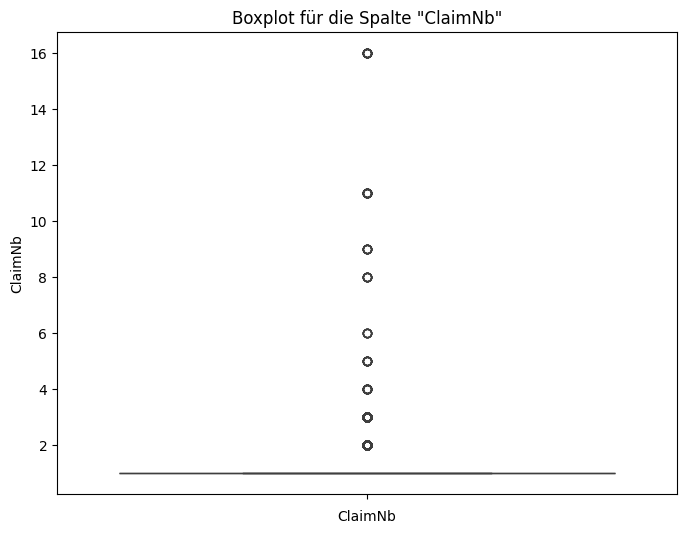

In [26]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['ClaimNb'])
plt.title('Boxplot für die Spalte "ClaimNb"')
plt.xlabel('ClaimNb')
plt.show()


array([[<Axes: title={'center': 'Exposure'}>]], dtype=object)

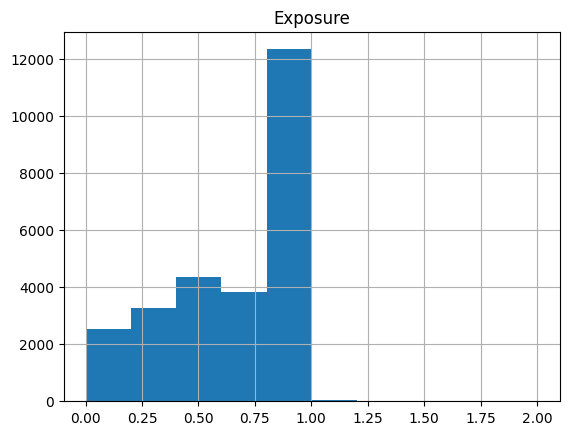

In [27]:
data.hist(column=["Exposure"])

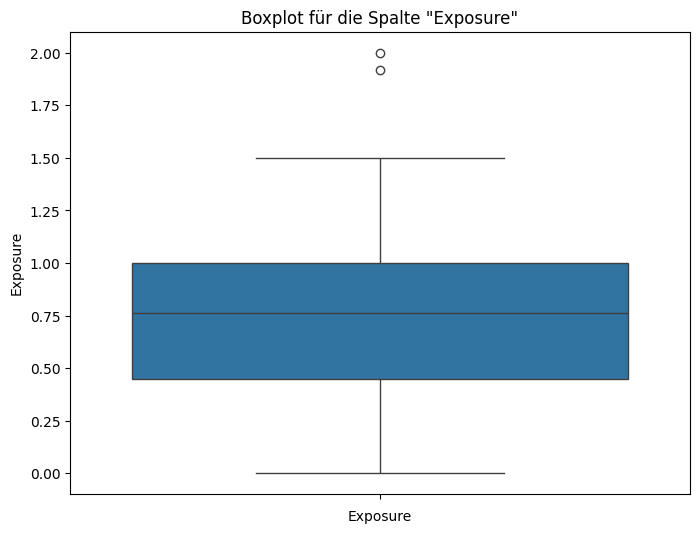

In [28]:
# Untersuche, ob es Ausreißer für die Länge des Versicherungszeitraums (in Jahren) gibt:
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['Exposure'])
plt.title('Boxplot für die Spalte "Exposure"')
plt.xlabel('Exposure')
plt.show()

<Axes: xlabel='Area'>

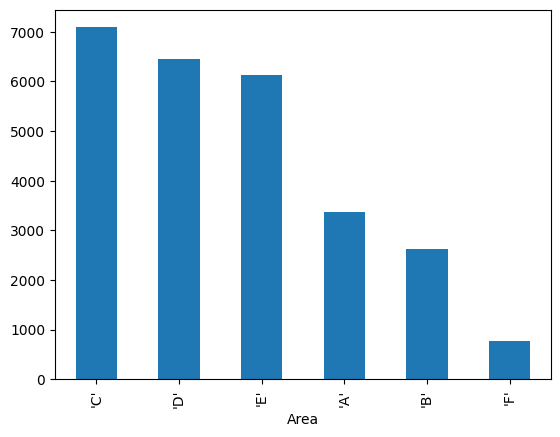

In [29]:
data['Area'].value_counts().plot(kind='bar')

<Axes: xlabel='VehBrand'>

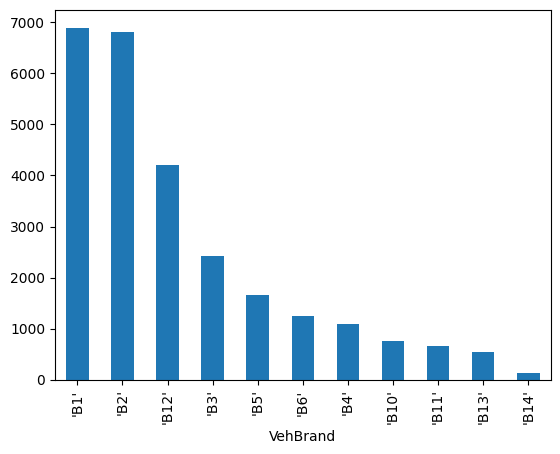

In [30]:
data['VehBrand'].value_counts().plot(kind='bar')

<Axes: xlabel='VehPower'>

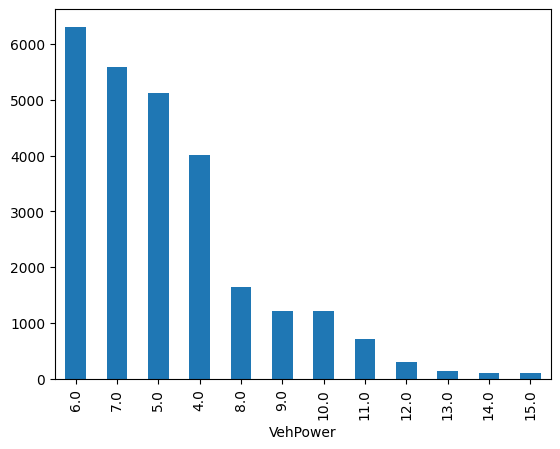

In [31]:
data['VehPower'].value_counts().plot(kind='bar')

array([[<Axes: title={'center': 'VehAge'}>]], dtype=object)

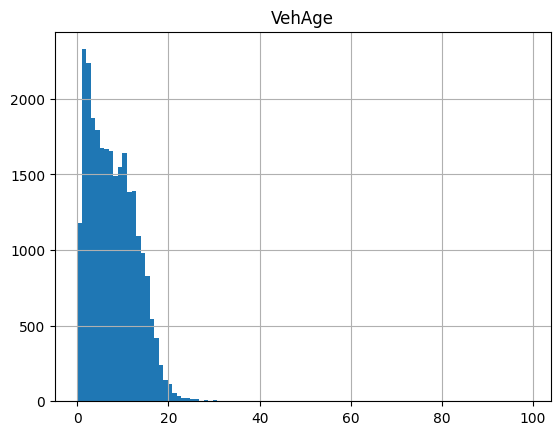

In [32]:
data.hist(column=["VehAge"], bins=100)

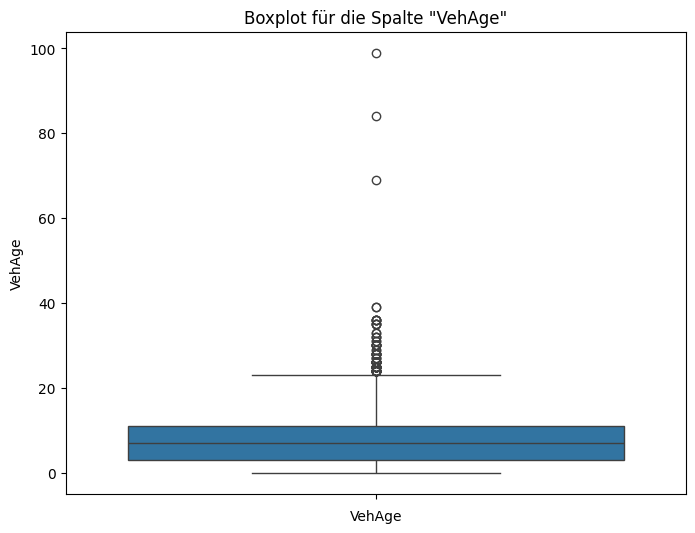

In [33]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['VehAge'])
plt.title('Boxplot für die Spalte "VehAge"')
plt.xlabel('VehAge')
plt.show()


array([[<Axes: title={'center': 'DrivAge'}>]], dtype=object)

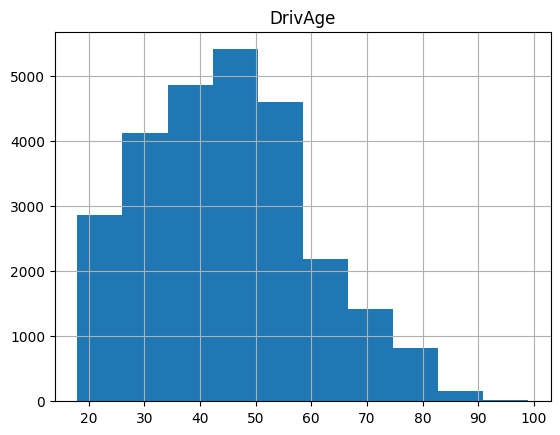

In [34]:
data.hist(column=["DrivAge"]) #, bins=50)

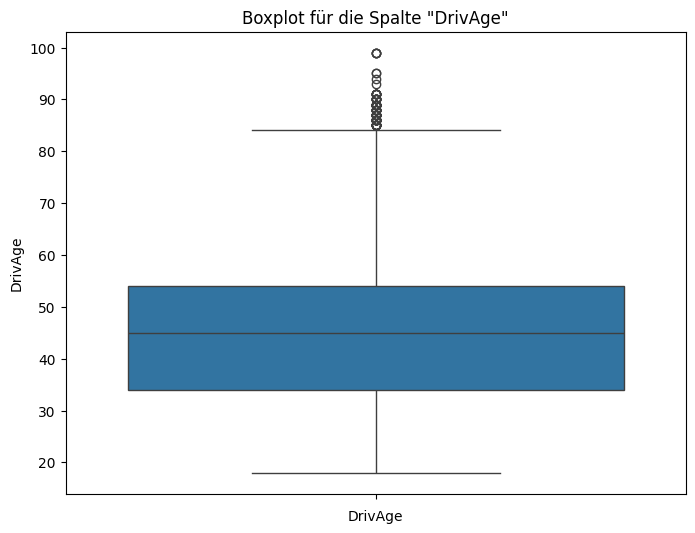

In [35]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['DrivAge'])
plt.title('Boxplot für die Spalte "DrivAge"')
plt.xlabel('DrivAge')
plt.show()


<Axes: xlabel='VehGas'>

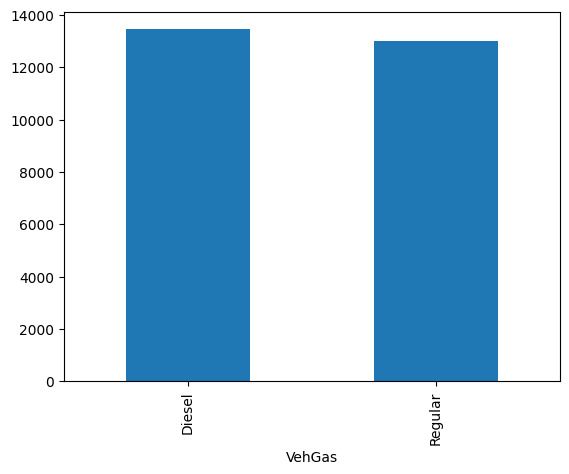

In [36]:
data['VehGas'].value_counts().plot(kind='bar')

<Axes: xlabel='Region'>

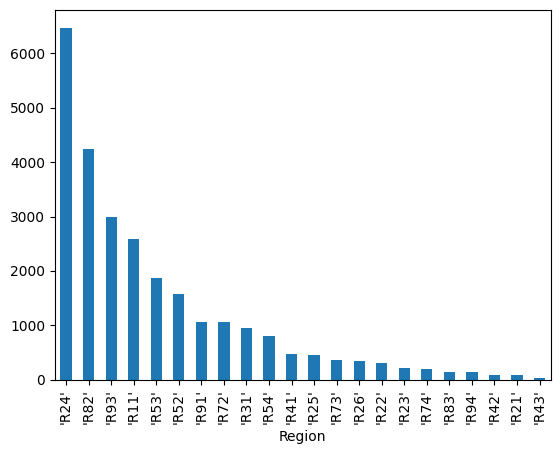

In [37]:
data['Region'].value_counts().plot(kind='bar')

array([[<Axes: title={'center': 'Density'}>]], dtype=object)

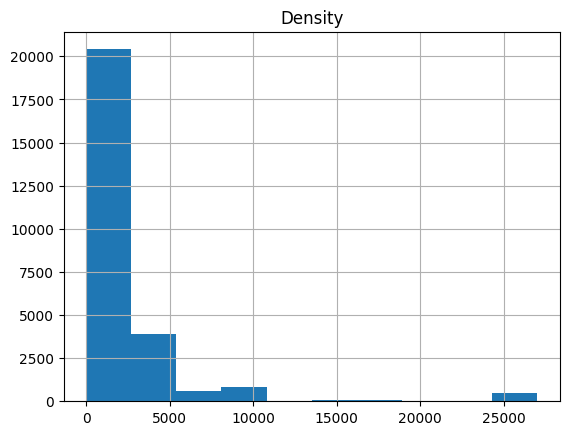

In [38]:
data.hist(column=["Density"])

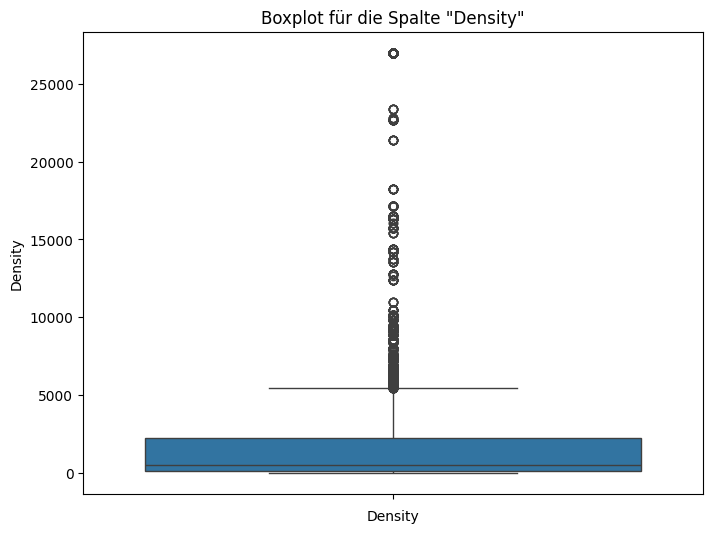

In [39]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['Density'])
plt.title('Boxplot für die Spalte "Density"')
plt.xlabel('Density')
plt.show()


### Teil 2: Analyse von freMTPL2sev.arff

array([[<Axes: title={'center': 'ClaimAmount'}>]], dtype=object)

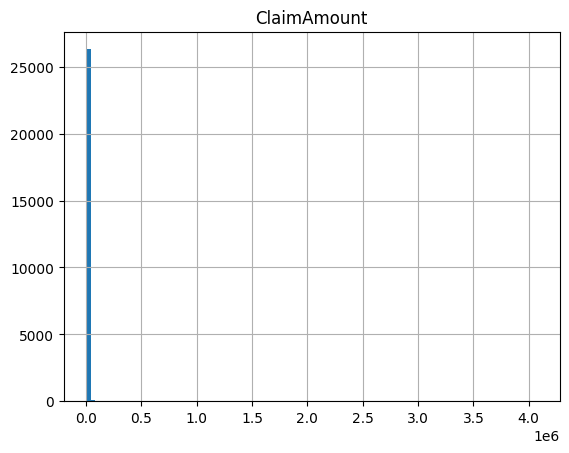

In [40]:
data.hist(column=["ClaimAmount"], bins=100)

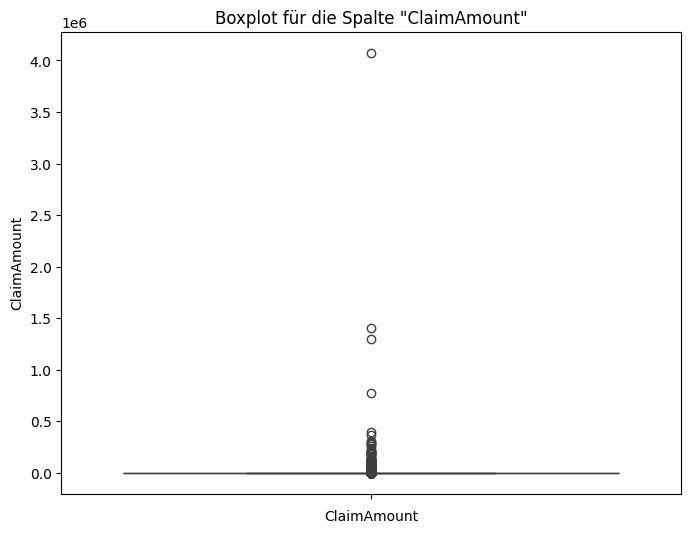

In [41]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['ClaimAmount'])
plt.title('Boxplot für die Spalte "ClaimAmount"')
plt.xlabel('ClaimAmount')
plt.show()


## Feature Engineering:

## Data Transformation 
### Mapping:

In [42]:
Area_mapping = { "'A'": 0, "'B'": 1, "'C'": 2, "'D'": 3 , "'E'": 4, "'F'": 5}
data['Area'] = data['Area'].map(Area_mapping)

VehBrand_mapping = { "'B1'": 0, "'B2'": 1, "'B3'": 2, "'B4'": 3, "'B5'": 4, "'B6'": 5, "'B10'": 6, "'B11'": 7, "'B12'": 8, "'B13'": 9, "'B14'": 10}
data['VehBrand'] = data['VehBrand'].map(VehBrand_mapping)

VehGas_mapping = { 'Regular': 0, 'Diesel': 1}
data['VehGas'] = data['VehGas'].map(VehGas_mapping)

Region_mapping = { "'R11'": 0, "'R21'": 1, "'R22'": 2, "'R23'": 3, "'R24'": 4, "'R25'": 5, "'R26'": 6, "'R31'": 7, "'R41'": 8, "'R42'": 9,
                 "'R43'": 10, "'R52'": 11, "'R53'": 12, "'R54'": 13, "'R72'": 14, "'R73'": 15, "'R74'": 16, "'R82'": 17, "'R83'": 18,
                 "'R91'": 19, "'R93'": 20, "'R94'": 21}
data['Region'] = data['Region'].map(Region_mapping)

In [43]:
Bin_mapping = { "Niedrig": 0, "Hoch": 1} # { "Niedrig": 0, "Niedrig-Mittel": 1, "Mittel": 2, "Mittel-Hoch": 3, "Hoch": 4}
data['bin'] = data['bin'].map(Bin_mapping)

In [44]:
data

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,ClaimAmount,ClaimAmountPerYear,bin
0,139.0,1.0,0.75,5,7.0,1.0,61.0,50.0,8,0,27000.0,0,303.00,404.000000,0
1,190.0,1.0,0.14,1,12.0,5.0,50.0,60.0,8,1,56.0,5,1981.84,14156.000000,1
2,414.0,1.0,0.14,4,4.0,0.0,36.0,85.0,8,0,4792.0,0,1456.55,10403.928571,1
3,424.0,2.0,0.62,5,10.0,0.0,51.0,100.0,8,0,27000.0,0,989.64,1596.193548,1
4,424.0,2.0,0.62,5,10.0,0.0,51.0,100.0,8,0,27000.0,0,9844.36,15878.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26439,6113793.0,1.0,0.14,2,7.0,2.0,51.0,50.0,8,1,178.0,14,1769.88,12642.000000,1
26440,6113817.0,1.0,0.17,3,4.0,0.0,35.0,51.0,8,0,1719.0,17,1288.28,7578.117647,1
26441,6113834.0,2.0,0.17,2,15.0,3.0,36.0,50.0,8,0,181.0,13,10290.00,60529.411765,1
26442,6113834.0,2.0,0.17,2,15.0,3.0,36.0,50.0,8,0,181.0,13,1940.40,11414.117647,1


## Ideen für Feature Engineering:

    DrivAge x BonusMalus: Interaktion zwischen Alter und Schadenfreiheitsrabatt
    VehAge x BonusMalus: Interaktion zwischen Fahrzeugalter und Schadenfreiheitsrabatt
    Density x Region: Interaktion zwischen Bevölkerungsdichte und Region
    VehPower x Area: Interaktion zwischen Fahrzeugleistung und Wohnort
    ClaimNb / Exposure: Schadenhäufigkeit pro Jahr


In [45]:
# Feature Engineering:
data['BonusMalusInRegion'] = data['BonusMalus'] * data['Region'] # Dies könnte zeigen, ob bestimmte Regionen eine höhere oder niedrigere Schadenhäufigkeit aufweisen, abhängig von der Schadenfreiheitsklasse.
data['DrivAgexBonusMalus'] = data['DrivAge'] * data['BonusMalus']
data['VehAgexBonusMalus'] = data['VehAge'] * data['BonusMalus']
data['DensityxRegion'] = data['Density'] * data['Region']
data['VehPowerxArea'] = data['VehPower'] * data['Area']
data['VehPowerPerDensity'] = data['VehPower'] / data['Density'] 


array([[<Axes: title={'center': 'BonusMalusInRegion'}>]], dtype=object)

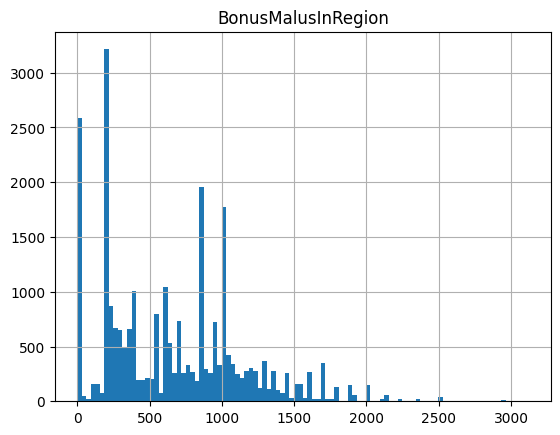

In [46]:
data.hist(column=["BonusMalusInRegion"], bins=100)

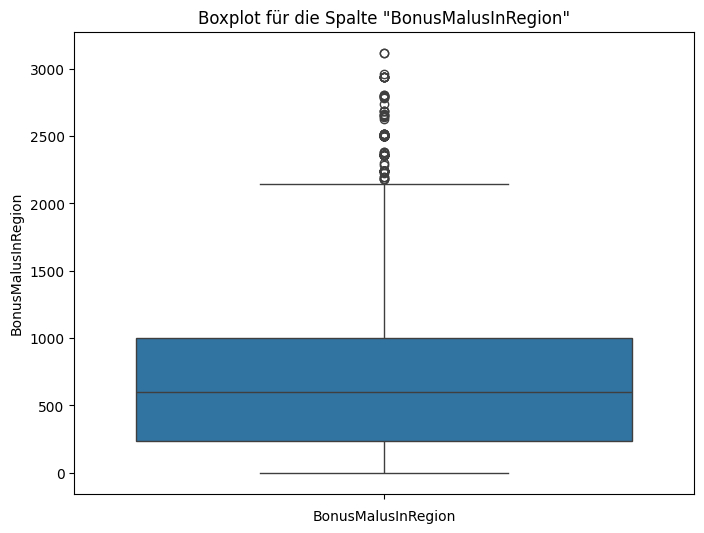

In [47]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['BonusMalusInRegion'])
plt.title('Boxplot für die Spalte "BonusMalusInRegion"')
plt.xlabel('BonusMalusInRegion')
plt.show()

In [48]:
data.describe()

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,ClaimAmount,ClaimAmountPerYear,BonusMalusInRegion,DrivAgexBonusMalus,VehAgexBonusMalus,DensityxRegion,VehPowerxArea,VehPowerPerDensity
count,2.644400e+04,26444.000000,26444.000000,26444.000000,26444.000000,26444.000000,26444.000000,26444.000000,26444.000000,26444.000000,26444.000000,26444.000000,2.644400e+04,2.644400e+04,26444.000000,26444.000000,26444.000000,26444.000000,26444.000000,26444.000000
mean,2.280004e+06,1.139427,0.691791,2.441045,6.464415,7.355090,45.121502,65.231054,2.906784,0.508622,2015.302942,10.364657,2.265513e+03,9.826644e+03,668.166087,2804.240697,493.971525,15921.969256,15.834707,0.059597
std,1.583004e+06,0.617563,0.313213,1.359278,2.017260,5.165475,14.694677,20.143480,3.053205,0.499935,4162.639153,6.792572,2.937103e+04,1.854732e+05,492.719220,963.655495,412.850856,29931.424773,10.678850,0.143860
min,1.390000e+02,1.000000,0.002740,0.000000,4.000000,0.000000,18.000000,50.000000,0.000000,0.000000,2.000000,0.000000,1.000000e+00,1.000000e+00,0.000000,900.000000,0.000000,0.000000,0.000000,0.000148
25%,1.086381e+06,1.000000,0.450000,2.000000,5.000000,3.000000,34.000000,50.000000,0.000000,0.000000,115.000000,4.000000,6.859925e+02,1.128000e+03,232.000000,2160.000000,174.000000,420.000000,8.000000,0.002885
50%,2.133756e+06,1.000000,0.760000,3.000000,6.000000,7.000000,45.000000,55.000000,1.000000,1.000000,524.500000,11.000000,1.172000e+03,1.433333e+03,600.000000,2600.000000,400.000000,3113.000000,15.000000,0.012027
75%,3.183953e+06,1.000000,1.000000,4.000000,7.000000,11.000000,54.000000,76.000000,5.000000,1.000000,2252.000000,17.000000,1.212385e+03,3.171083e+03,1000.000000,3200.000000,700.000000,15464.000000,21.000000,0.053846
max,6.113971e+06,16.000000,2.000000,5.000000,15.000000,99.000000,99.000000,228.000000,10.000000,1.000000,27000.000000,21.000000,4.075401e+06,1.852455e+07,3120.000000,14532.000000,9912.000000,158219.000000,75.000000,6.000000


In [49]:
data.drop(columns=['IDpol', 'ClaimAmount', 'Exposure', 'ClaimNb'], inplace=True) # diese Features sind in der abhängigen Variablen enthalten oder unwesentlich

In [50]:
from sklearn.preprocessing import StandardScaler

# Auswahl der Features, die standardisiert werden sollen
features_to_standardize = ['VehPower', 'VehBrand', 'Area', 'VehGas', 'VehPowerxArea', 'BonusMalusInRegion'] # 'Exposure',

# Erstellen des StandardScaler-Objekts
scaler = StandardScaler()

# Anwenden der Standardisierung auf die ausgewählten Features
data[features_to_standardize] = scaler.fit_transform(data[features_to_standardize])


In [51]:
from sklearn.preprocessing import MinMaxScaler

# Auswahl der Features, die normalisiert werden sollen
features_to_normalize = ['VehAge', 'DrivAge', 
        'BonusMalus', 'Density', 'Region', 
        'VehPowerPerDensity', 'DensityxRegion', 'DrivAgexBonusMalus', 'VehAgexBonusMalus']
        #'ClaimNb', 'ClaimAmount', 'ClaimNbPerYear', 'ClaimAmountPerYear',

# Erstellen des MinMaxScaler-Objekts
scaler = MinMaxScaler()

# Anwenden der Normalisierung auf die ausgewählten Features
data[features_to_normalize] = scaler.fit_transform(data[features_to_normalize])

In [52]:
data

,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,ClaimAmountPerYear,bin,BonusMalusInRegion,DrivAgexBonusMalus,VehAgexBonusMalus,DensityxRegion,VehPowerxArea,VehPowerPerDensity
0,1.882619,0.265506,0.010101,0.530864,0.000000,1.668186,-1.017395,1.000000,0.000000,404.000000,0,-1.356104,0.157717,0.005044,0.000000,1.794730,0.000019
1,-1.060175,2.744162,0.050505,0.395062,0.056180,1.668186,0.982902,0.002000,0.238095,14156.000000,1,-0.747227,0.154049,0.030266,0.001770,-0.359100,0.035690
2,1.146920,-1.221688,0.000000,0.222222,0.196629,1.668186,-1.017395,0.177421,0.000000,10403.928571,1,-1.356104,0.158451,0.000000,0.000000,0.015479,0.000114
3,1.882619,1.752700,0.000000,0.407407,0.280899,1.668186,-1.017395,1.000000,0.000000,1596.193548,1,-1.356104,0.308099,0.000000,0.000000,3.199402,0.000037
4,1.882619,1.752700,0.000000,0.407407,0.280899,1.668186,-1.017395,1.000000,0.000000,15878.000000,1,-1.356104,0.308099,0.000000,0.000000,3.199402,0.000037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26439,-0.324476,0.265506,0.020202,0.407407,0.000000,1.668186,0.982902,0.006519,0.666667,12642.000000,1,0.064610,0.121039,0.010089,0.015750,-0.171811,0.006530
26440,0.411222,-1.221688,0.000000,0.209877,0.005618,1.668186,-1.017395,0.063597,0.809524,7578.117647,1,0.403552,0.064921,0.000000,0.184700,-0.359100,0.000363
26441,-0.324476,4.231356,0.030303,0.222222,0.000000,1.668186,-1.017395,0.006630,0.619048,60529.411765,1,-0.036870,0.066021,0.015133,0.014872,1.326506,0.013788
26442,-0.324476,4.231356,0.030303,0.222222,0.000000,1.668186,-1.017395,0.006630,0.619048,11414.117647,1,-0.036870,0.066021,0.015133,0.014872,1.326506,0.013788


## Feature Selection anhand Korrelationen

In [53]:
correlation_matrix = data.corr()
correlation_matrix

,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,ClaimAmountPerYear,bin,BonusMalusInRegion,DrivAgexBonusMalus,VehAgexBonusMalus,DensityxRegion,VehPowerxArea,VehPowerPerDensity
Area,1.000000,0.019978,-0.070489,-0.037330,0.085583,0.120064,-0.131115,0.592923,0.088581,0.001889,0.062196,0.106277,0.045889,-0.023713,0.492129,0.836212,-0.576273
VehPower,0.019978,1.000000,-0.019775,0.021954,-0.067810,0.255793,0.024959,0.048826,0.011632,0.000692,0.020174,-0.020371,-0.021555,-0.031979,0.008919,0.499037,0.129215
VehAge,-0.070489,-0.019775,1.000000,-0.072755,0.136393,-0.286994,-0.120096,-0.078865,-0.036357,0.004703,-0.047963,0.023321,0.031935,0.880988,-0.009234,-0.069428,0.032685
DrivAge,-0.037330,0.021954,-0.072755,1.000000,-0.469888,0.041979,-0.055772,0.003977,0.031136,-0.027232,-0.107865,-0.158840,0.627397,-0.247975,0.007636,-0.017043,0.036668
BonusMalus,0.085583,-0.067810,0.136393,-0.469888,1.000000,-0.071645,-0.042629,0.048121,-0.057970,0.020899,0.092707,0.352968,0.339243,0.513413,0.030563,0.035972,-0.057664
VehBrand,0.120064,0.255793,-0.286994,0.041979,-0.071645,1.000000,-0.007315,0.123860,0.045240,-0.006213,0.117179,0.003688,-0.006314,-0.257241,0.017556,0.218621,-0.008157
VehGas,-0.131115,0.024959,-0.120096,-0.055772,-0.042629,-0.007315,1.000000,-0.106956,-0.004952,-0.007509,-0.001195,-0.020587,-0.073518,-0.118512,-0.061012,-0.100429,0.090305
Density,0.592923,0.048826,-0.078865,0.003977,0.048121,0.123860,-0.106956,1.000000,-0.175637,-0.003519,0.034508,-0.141167,0.058752,-0.051204,0.295530,0.530587,-0.189777
Region,0.088581,0.011632,-0.036357,0.031136,-0.057970,0.045240,-0.004952,-0.175637,1.000000,-0.008707,0.029483,0.873292,-0.010137,-0.052090,0.462437,0.065568,-0.089408
ClaimAmountPerYear,0.001889,0.000692,0.004703,-0.027232,0.020899,-0.006213,-0.007509,-0.003519,-0.008707,1.000000,0.048499,0.000207,-0.016207,0.014765,-0.001992,0.000112,-0.001937


In [54]:
# Extrahieren der oberen rechten Dreiecksmatrix, da die Korrelationsmatrix symmetrisch ist
upper_triangle = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))

# Bestimmen der Features mit den höchsten Korrelationen
n_largest_correlations = upper_triangle.stack().nlargest(5)

print("Features mit den höchsten Korrelationen:")
print(n_largest_correlations)


Features mit den höchsten Korrelationen:
VehAge   VehAgexBonusMalus     0.880988
Region   BonusMalusInRegion    0.873292
Area     VehPowerxArea         0.836212
DrivAge  DrivAgexBonusMalus    0.627397
Area     Density               0.592923
dtype: float64


/tmp/ipykernel_15144/1503842927.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))


## Features mit hohen Korrelationen untereinander, die behalten werden: VehAgexBonusMalus, BonusMalusInRegion, Area

## Klassifikation statt Regression

In [57]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

# Daten vorbereiten
#X = data.drop(columns=['IDpol', 'ClaimAmountPerYear', 'bin']) # Unabhängige Variable
X = data.drop(columns=['bin', 'ClaimAmountPerYear', 'VehAge', 'Region', 'VehPowerxArea']) 

y = data['bin']       # Abhängige Variable (Bins)

# Aufteilung der Daten in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# GradientBoosting-Modell initialisieren und trainieren
gb_classifier = HistGradientBoostingClassifier(learning_rate=0.5, n_iter_no_change=25, random_state=42, scoring='accuracy')
gb_classifier.fit(X_train, y_train)

# Vorhersagen auf den Testdaten
y_pred = gb_classifier.predict(X_test)

# Bewertung des Modells
accuracy = accuracy_score(y_test, y_pred)
print("Genauigkeit des GradientBoosting-Modells:", accuracy)

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-Score des GradientBoosting-Modells:", f1)

Genauigkeit des GradientBoosting-Modells: 0.592361505010399
F1-Score des GradientBoosting-Modells: 0.5919574488258851


Ergebnis für 3 Klassen:

Genauigkeit des GradientBoosting-Modells: 0.4021554169030062
F1-Score des GradientBoosting-Modells: 0.3977687399293918

In [58]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, median_absolute_error, mean_absolute_error

# Auswahl der relevanten unabhängigen Variablen und der abhängigen Variable
features = data.drop(columns=['bin', 'ClaimAmountPerYear', 'VehAge', 'Region', 'VehPowerxArea']).columns.tolist()

target = 'bin'

# Aufteilung der Daten in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

# Definition des Gradient Boosting Regressors
hgb_classifier = HistGradientBoostingClassifier(random_state=42)

# Definition der Hyperparameter, die optimiert werden sollen
param_grid = {
    'learning_rate': [0.01, 0.1, 0.5, 0.005, 0.001, 0.0005],
    'n_iter_no_change': [10, 20],
    'max_depth': [3, 5, 9, 15],
    'l2_regularization': [0.1, 0.2]
}

# Definition der Metrik für die Evaluierung
scoring = make_scorer(accuracy_score)

# GridSearchCV zur Durchführung des Hyperparameter-Tunings mit 3-facher Kreuzvalidierung
grid_search = GridSearchCV(estimator=hgb_classifier, param_grid=param_grid, scoring=scoring, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Beste Hyperparameter-Kombination
best_params = grid_search.best_params_
print("Beste Hyperparameter-Kombination:", best_params)

# Beste Modellleistung
best_score = grid_search.best_score_
print("Beste Modellleistung (MAE):", best_score)

# Beste Modellinstanz
best_model = grid_search.best_estimator_

# Vorhersagen auf den Testdaten
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

accuracy = accuracy_score(y_test, y_pred)
print("Genauigkeit des GradientBoosting-Modells:", accuracy)

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-Score des GradientBoosting-Modells:", f1)

Beste Hyperparameter-Kombination: {'l2_regularization': 0.2, 'learning_rate': 0.1, 'max_depth': 9, 'n_iter_no_change': 10}
Beste Modellleistung (MAE): 0.6060505840024247
Mean Squared Error: 0.3996974853469465
Genauigkeit des GradientBoosting-Modells: 0.6003025146530535
F1-Score des GradientBoosting-Modells: 0.5988752425551828


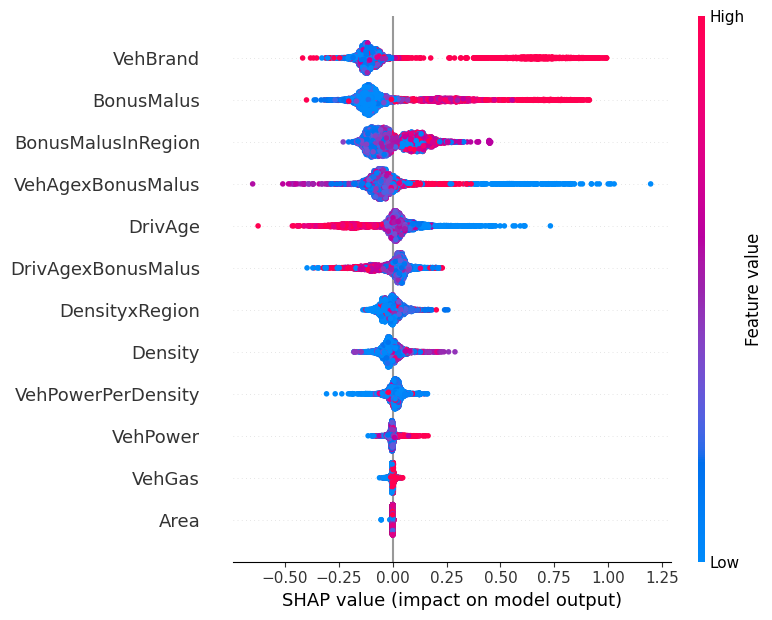

In [59]:
import shap

# Berechnen der SHAP-Werte
explainer = shap.Explainer(best_model)
shap_values = explainer.shap_values(X_test)

# Plot der SHAP-Summenplots
shap.summary_plot(shap_values, X_test)


## Teste XGBoost (keine Verbesserung)

In [60]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

# Daten vorbereiten
X = data.drop(columns=['bin', 'ClaimAmountPerYear', 'VehAge', 'Region', 'VehPowerxArea'])
y = data['bin']       # Abhängige Variable (Bins)

# Aufteilung der Daten in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost-Modell initialisieren und trainieren
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)

# Vorhersagen auf den Testdaten
y_pred = xgb_classifier.predict(X_test)

# Bewertung des Modells
accuracy = accuracy_score(y_test, y_pred)
print("Genauigkeit:", accuracy)

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-Score:", f1)


Genauigkeit: 0.5906598600869729
F1-Score: 0.5902880014381071
